Let's visualize.

In [51]:
library(tidyverse)
library(ggplot2)
library(GEOquery)
options(repr.plot.width=16, repr.plot.height=8)

Let's get the data from the last notebook.

In [44]:
data <- read.csv(file = '../data/GSE183947_fpkm.csv')
gse = getGEO(GEO = 'GSE183947')
metadata = pData(phenoData(gse[[1]]))
metadata.modified <- metadata %>%
    select(c(1,10,11,17)) %>%
    rename(tissue = characteristics_ch1) %>%
    rename(metastasis = characteristics_ch1.1) %>%
    mutate(tissue = gsub('tissue: ', '', tissue)) %>%
    mutate(metastasis = gsub('metastasis: ', '', metastasis))
data.long <- data %>%
    rename(gene = X) %>%
    gather(key = samples, value = FPKM, -gene)
data.long = left_join(data.long, metadata.modified, by = c('samples' = 'description'))
data.long[1:3,]

Found 1 file(s)

GSE183947_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpYpfWJ4/GSE183947_series_matrix.txt.gz

Using locally cached version of GPL11154 found here:
/tmp/RtmpYpfWJ4/GPL11154.soft.gz 



,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,TSPAN6,CA.102548,0.93,tumor rep1,breast tumor,yes
2,TNMD,CA.102548,0.00,tumor rep1,breast tumor,yes
3,DPM1,CA.102548,0.00,tumor rep1,breast tumor,yes


## Bar graph

to use a ggplot, we have to use `ggplot` with data and mapping and provide information about the plot with a `+` sign. 

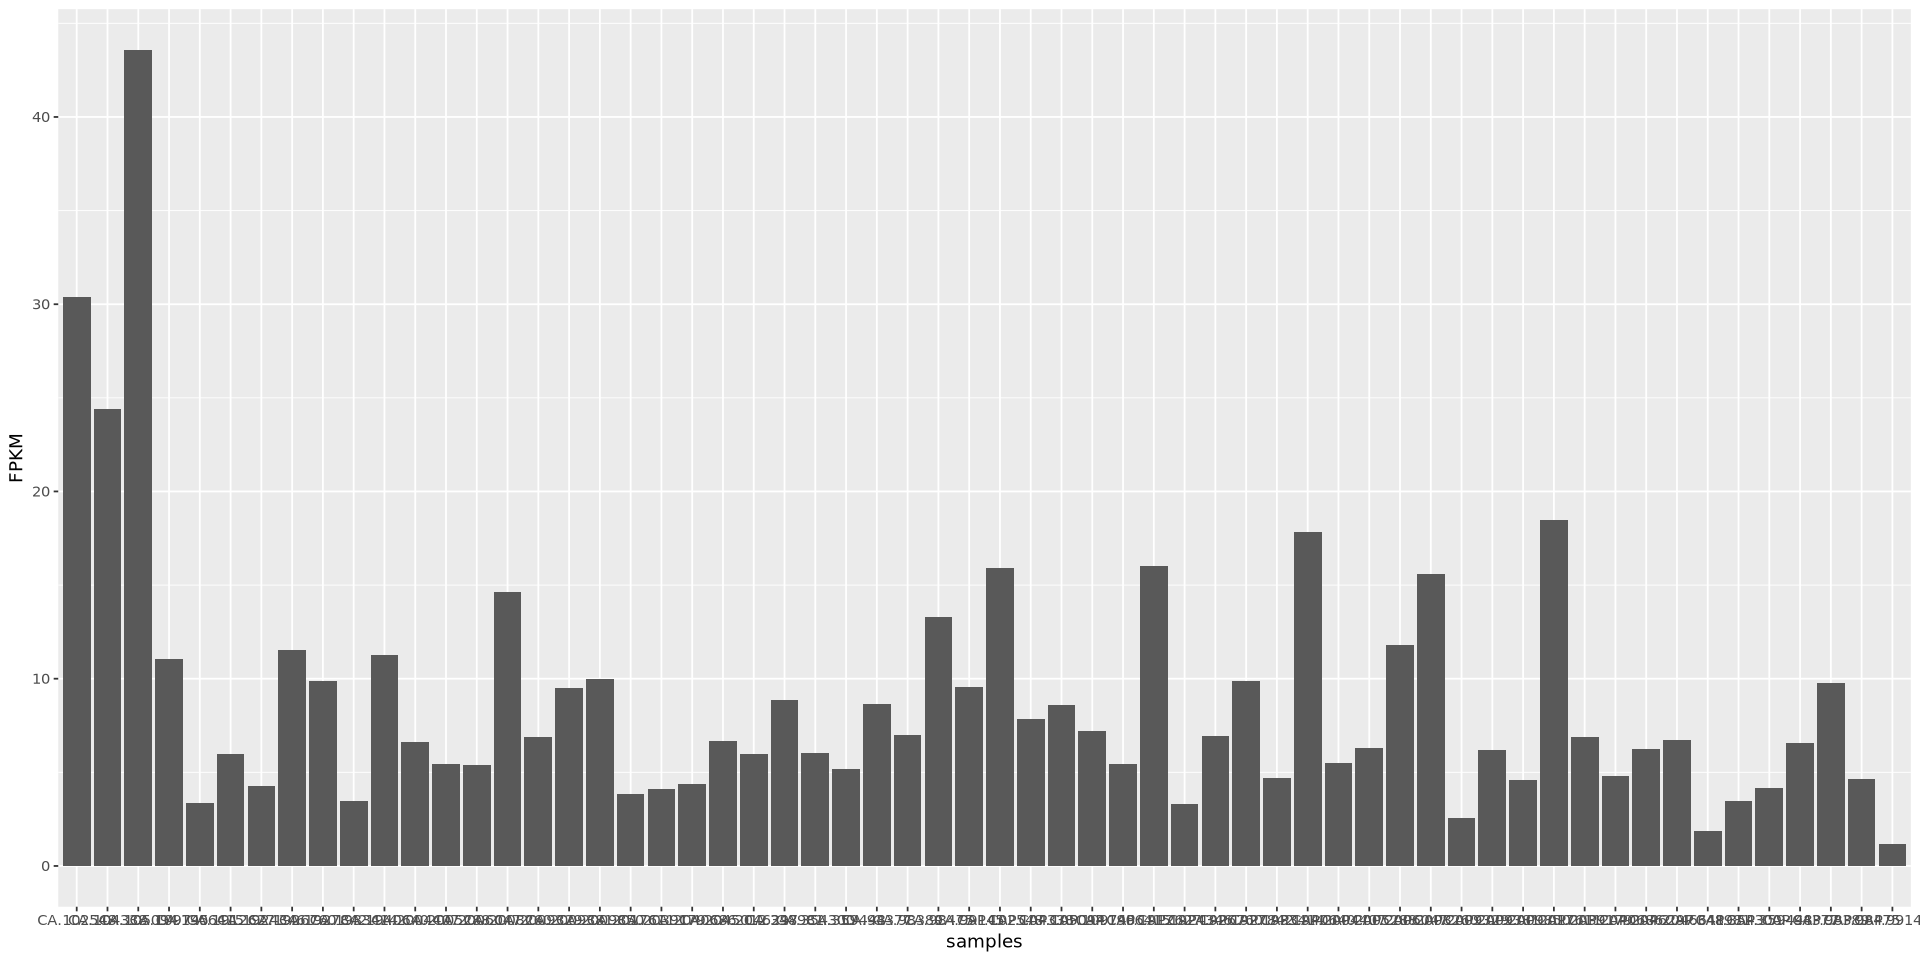

In [56]:
data.long %>%
    filter(gene == 'BRCA1') %>%
    ggplot(., aes(x = samples, y = FPKM))  +
    geom_col()

We can change the aesthetics (aes) of the graph with `fill`.

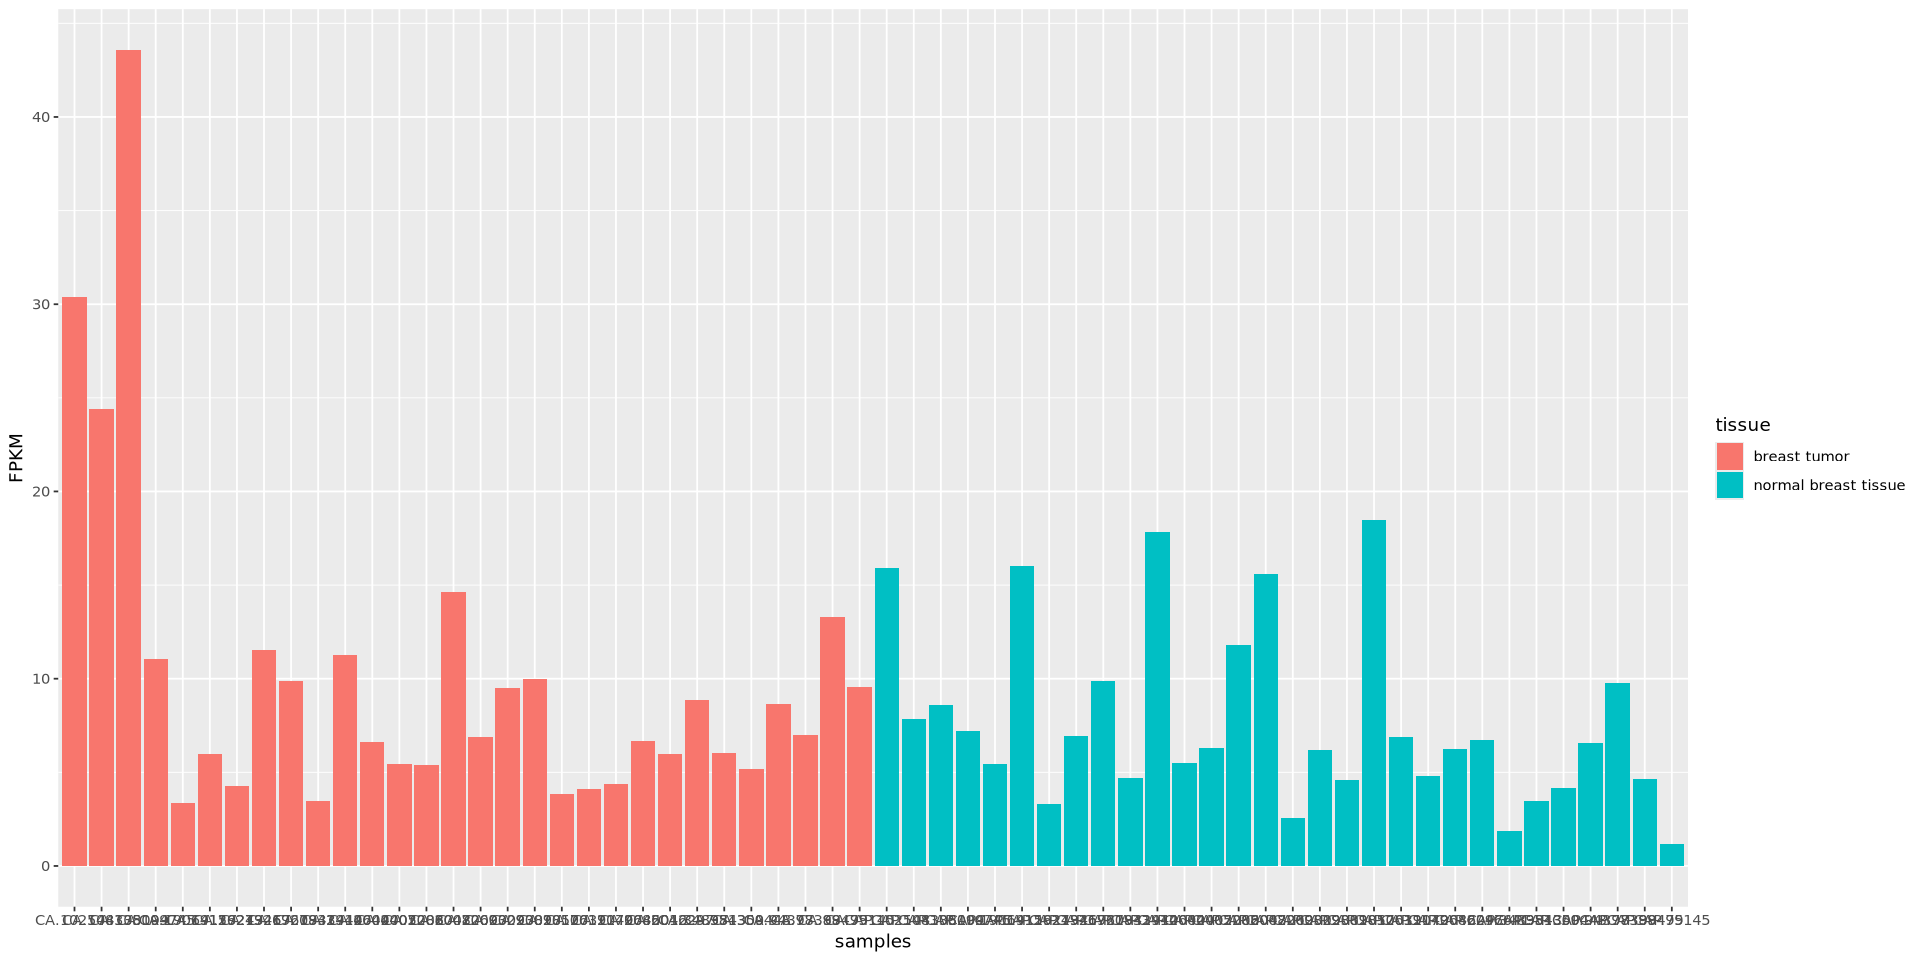

In [54]:
data.long %>%
    filter(gene == 'BRCA1') %>%
    ggplot(., aes(x = samples, y = FPKM, fill = tissue)) + 
    geom_col()

## density graph

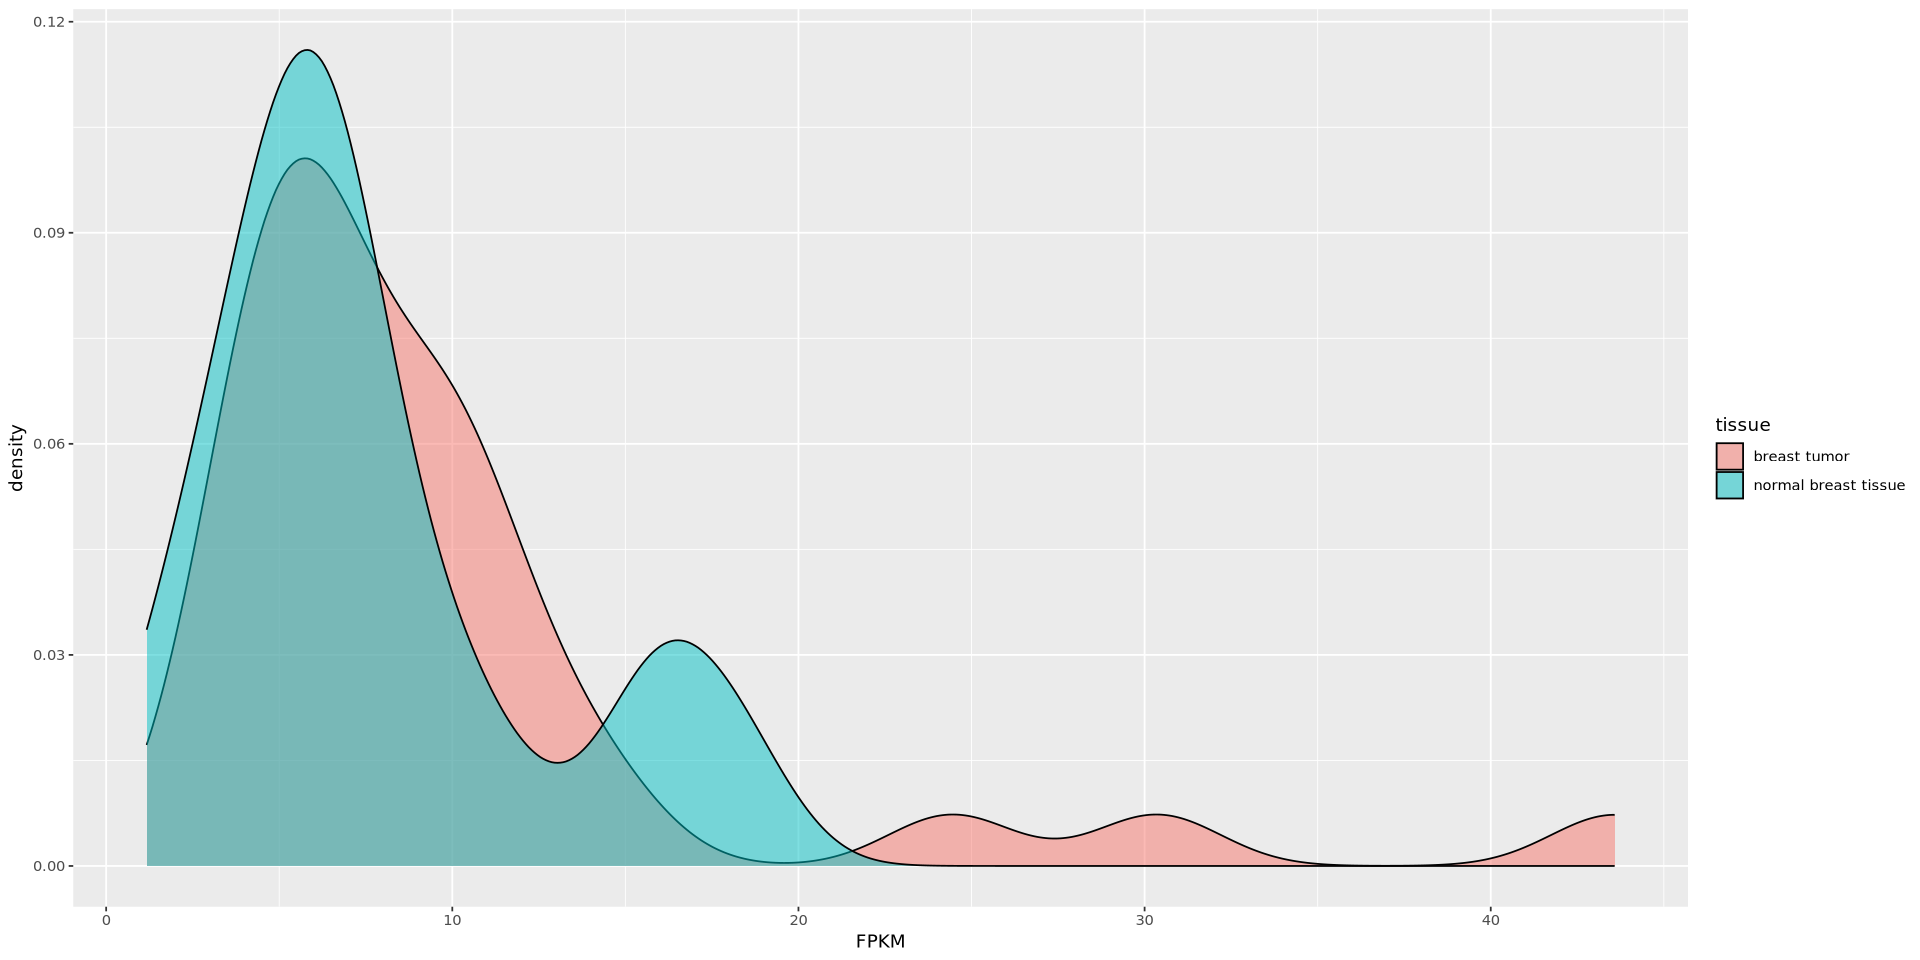

In [68]:
data.long %>%
    filter(gene == 'BRCA1') %>%
    ggplot(., aes(FPKM, fill = tissue)) + 
    geom_density(alpha = .5)